In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
import seaborn as sns

In [2]:
dataset = pd.read_csv("cubic.csv")
dataset.head(n=10)

,index,compounds,rA (A),rB (A),rX (A),vA,vB,vX,eA,eB,eX,a (A),a [Jiang] (A),reference
0,1,BaAmO 3,1.35,0.85,1.4,2,4,-2,0.89,1.30,3.44,4.357,4.319,[1]
1,2,BaCeO 3,1.35,0.87,1.4,2,4,-2,0.89,1.12,3.44,4.397,4.346,[1]
2,3,BaFeO3,1.35,0.59,1.4,2,4,-2,0.89,1.83,3.44,3.994,3.998,[1]
3,4,BaHfO 3,1.35,0.71,1.4,2,4,-2,0.89,1.30,3.44,4.171,4.141,[1]
4,5,BaIrO3,1.35,0.63,1.4,2,4,-2,0.89,2.20,3.44,4.100,4.045,[1]
5,6,BaMoO3,1.35,0.65,1.4,2,4,-2,0.89,2.16,3.44,4.040,4.068,[1]
6,7,BaNbO3,1.35,0.68,1.4,2,4,-2,0.89,1.60,3.44,4.080,4.104,[1]
7,8,BaNpO3,1.35,0.87,1.4,2,4,-2,0.89,1.36,3.44,4.384,4.346,[1]
8,9,BaPaO3,1.35,0.90,1.4,2,4,-2,0.89,1.50,3.44,4.450,4.386,[1]
9,10,BaPbO3,1.35,0.78,1.4,2,4,-2,0.89,2.33,3.44,4.265,4.229,[1]


In [3]:
# Separating features and labels
x = dataset.iloc[:,2:11].values
y = dataset.iloc[:,11:12].values

In [4]:
#print(x)
#print(y)

In [5]:
# Separating testing and training dataset

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [6]:
#Using GridSearchCV to optimize the value of "C", "epsilon" and "gamma" from a given set of data and 
#fiting the gd_sr with training data to get the best value of "C", "epsilon" and "gamma" for better accuracy

for i in range(10):
    #x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    grid_para={'C':(0.01, 0.1, 1, 5, 10, 50, 100, 150, 200), 'epsilon':np.arange(0.05, 1, 0.05), 'gamma':np.arange(0, 10, 0.25)}
    gd_sr = GridSearchCV(SVR(kernel = 'rbf'),param_grid = grid_para, scoring='r2', n_jobs=-1, cv=5)
    gd_sr.fit(x_train, y_train.reshape(120,))
    best_para = gd_sr.best_params_
    best_result = gd_sr.best_score_
    print("Hyperparamter for a:",best_para)
    print("best accuracy for a:",best_result)
#C=10 epsilon=0.05 gamma=0.25 best accuracy=0.9870359714445132

Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523
Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523
Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523
Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523
Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523
Hyperparamter for a: {'C': 50, 'epsilon': 0.05, 'gamma': 0.25}
best accuracy for a: 0.9848274811620523


KeyboardInterrupt: 

In [7]:
#print(np.shape(y_train.reshape(120,)))

In [26]:
# Defining the SVR Model with the optimized parameter value. We have choosen C=10, epsilon=0.05 and gamma=0.25 as the
# average accuracy score is 0.98513.

reg = SVR(kernel='rbf', C=10.95, epsilon=0.02, gamma=0.05)

In [27]:
# Fiting the model with training data set

f = reg.fit(x_train,y_train.reshape(120,))
ypred = f.predict(x_test)

In [28]:
# Calculating error in the training data from the model

print("Mean Training error is",np.mean(np.abs((y_train.reshape(np.shape(f.predict(x_train)))-f.predict(x_train))*100/y_train)))

Mean Training error is 0.6370960946862183


In [30]:
# Calculating the accuracy score on training dataset. Returns R^2 value

# The coefficient R^2 is defined as (1 - u/v), where u is the residual sum of squares ((y_true - y_pred) ** 2).sum() 
#and v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). The best possible score is 1.0 and it can 
#be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y,
#disregarding the input features, would get a R^2 score of 0.0.

print(f'For training dataset, the R^2 value is {reg.score(x_train, y_train)} and mean error (in %) is {np.mean(np.abs((y_train.reshape(np.shape(f.predict(x_train)))-f.predict(x_train))*100/y_train))}')

For training dataset, the R^2 value is 0.9940205197219488 and mean error (in %) is 0.6370960946862183


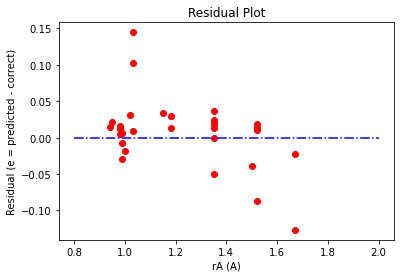

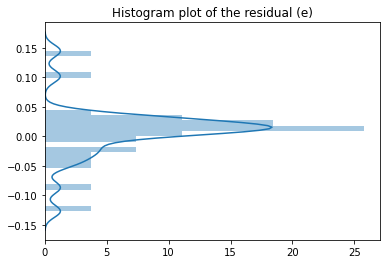

In [22]:
# Residual plot

e = ypred-y_test.reshape(30,)
#print(e)
plt.scatter(x_test[:,0], e, color='r')
plt.plot(np.linspace(0.8,2,20), np.zeros(20), '-.', color='b')
plt.title("Residual Plot")
plt.xlabel("rA (A)")
plt.ylabel("Residual (e = predicted - correct)")
plt.show()
plt.title("Histogram plot of the residual (e)")
sns.distplot(e, bins=30, vertical=True)
plt.show()

In [23]:
# Calculating error in the testing data from the model

error = abs((y_test-ypred.reshape(np.shape(y_test)))*100/y_test)
print("Mean error in a as predicted by test data is (in %):", np.mean(error))

Mean error in a as predicted by test data is (in %): 0.7692998841315674


In [31]:
# Calculating the accuracy score on testing dataset

print(f'For testing dataset, the R^2 value is {reg.score(x_test, y_test)} and mean error (in %) is {np.mean(error)}')

For testing dataset, the R^2 value is 0.9944106974604786 and mean error (in %) is 0.7692998841315674


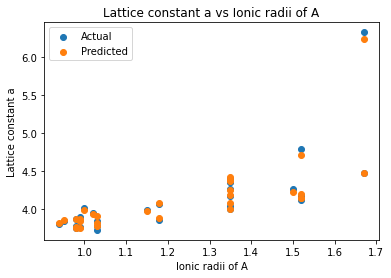

In [56]:
s1 = plt.scatter(x_test[:,0], y_test)
s2 = plt.scatter(x_test[:,0], ypred)
plt.legend((s1, s2),('Actual','Predicted'))
plt.title('Lattice constant a vs Ionic radii of A')
plt.xlabel('Ionic radii of A')
plt.ylabel('Lattice constant a')
plt.show()

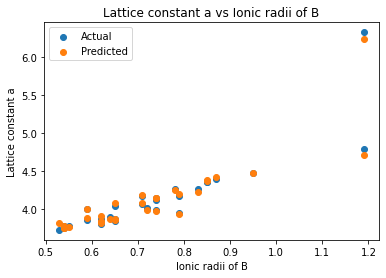

In [57]:
s3 = plt.scatter(x_test[:,1], y_test)
s4 = plt.scatter(x_test[:,1], ypred)
plt.legend((s3, s4),('Actual','Predicted'))
plt.title('Lattice constant a vs Ionic radii of B')
plt.xlabel('Ionic radii of B')
plt.ylabel('Lattice constant a')
plt.show()

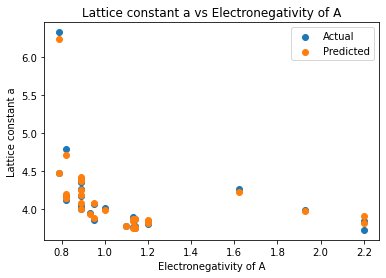

In [58]:
i = 6
s5 = plt.scatter(x_test[:,i], y_test)
s6 = plt.scatter(x_test[:,i], ypred)
plt.legend((s5, s6),('Actual','Predicted'))
plt.title('Lattice constant a vs Electronegativity of A')
plt.xlabel('Electronegativity of A')
plt.ylabel('Lattice constant a')
plt.show()

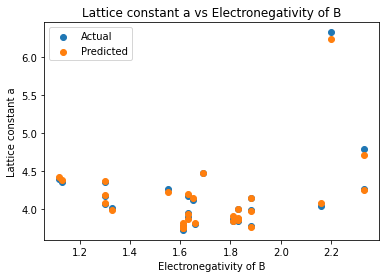

In [59]:
i = 7
s7 = plt.scatter(x_test[:,i], y_test)
s8 = plt.scatter(x_test[:,i], ypred)
plt.legend((s7, s8),('Actual','Predicted'))
plt.title('Lattice constant a vs Electronegativity of B')
plt.xlabel('Electronegativity of B')
plt.ylabel('Lattice constant a')
plt.show()

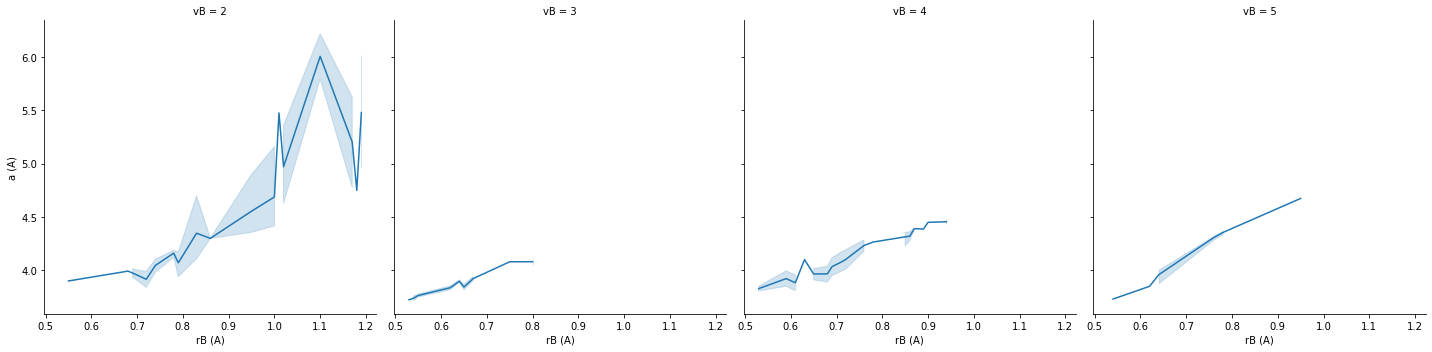

In [16]:
sns.relplot(data=dataset, kind="line", x="rB (A)", y="a (A)", col="vB")

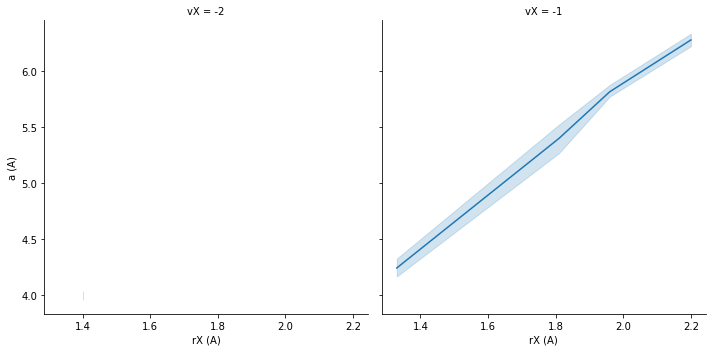

In [17]:
sns.relplot(data=dataset, kind="line", x="rX (A)", y="a (A)", col="vX")

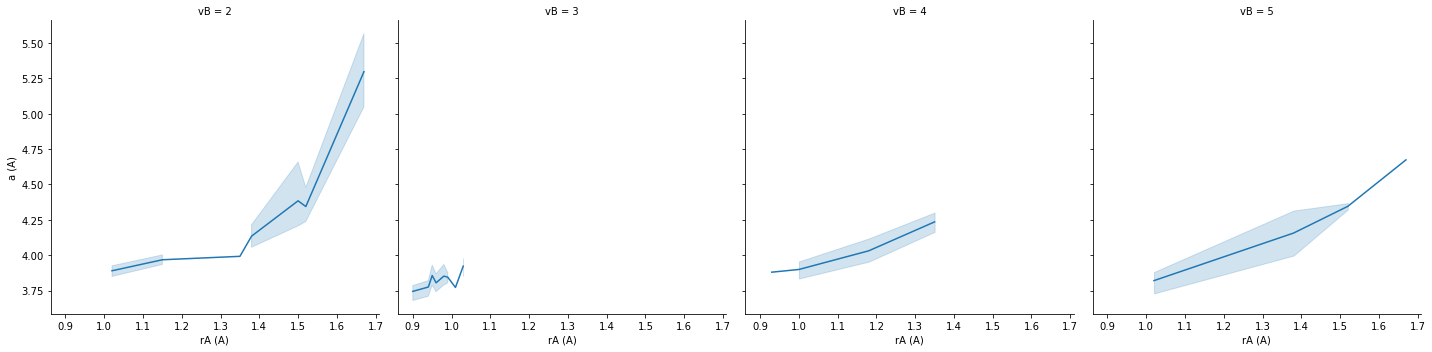

In [18]:
sns.relplot(data=dataset, kind="line", x="rA (A)", y="a (A)", col="vB")

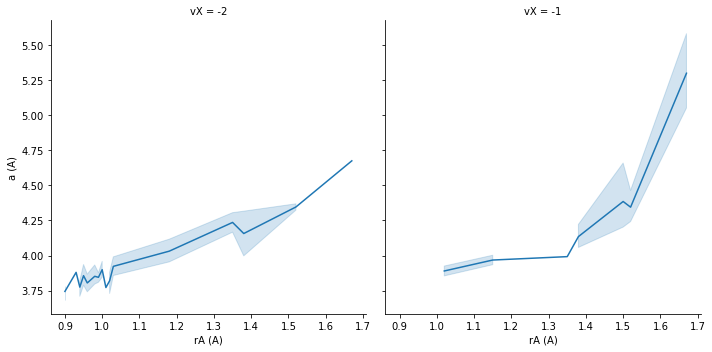

In [19]:
sns.relplot(data=dataset, kind="line", x="rA (A)", y="a (A)", col="vX")

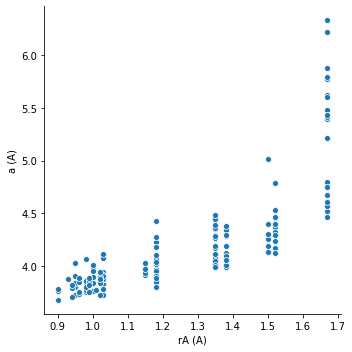

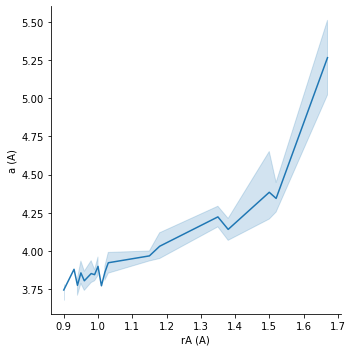

In [20]:
sns.relplot(data=dataset, x="rA (A)", y="a (A)")
sns.relplot(data=dataset, kind="line", x="rA (A)", y="a (A)")

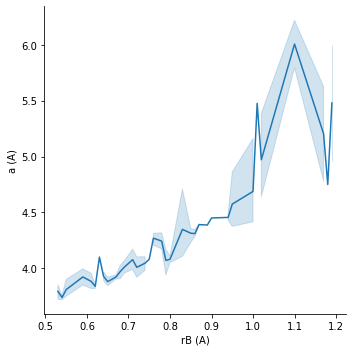

In [21]:
sns.relplot(data=dataset, kind="line", x="rB (A)", y="a (A)")

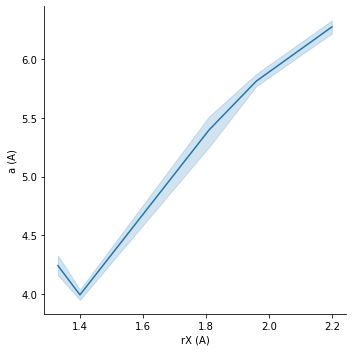

In [22]:
sns.relplot(data=dataset, kind="line", x="rX (A)", y="a (A)")

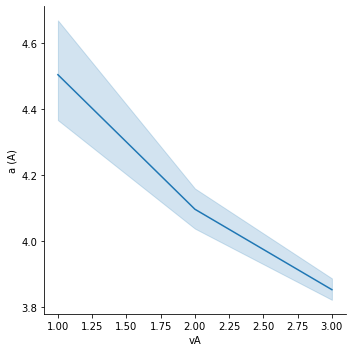

In [23]:
sns.relplot(data=dataset, kind="line", x="vA", y="a (A)")

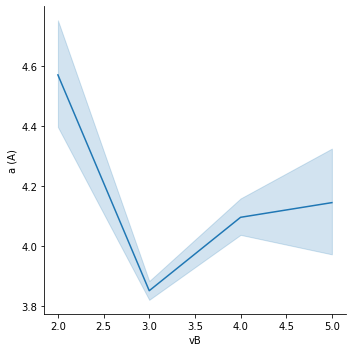

In [24]:
sns.relplot(data=dataset, kind="line", x="vB", y="a (A)")

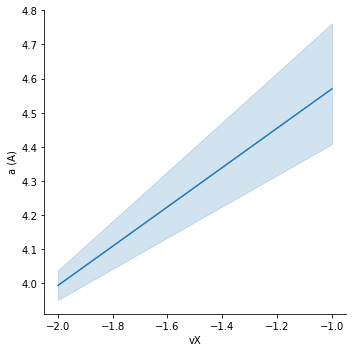

In [25]:
sns.relplot(data=dataset, kind="line", x="vX", y="a (A)")

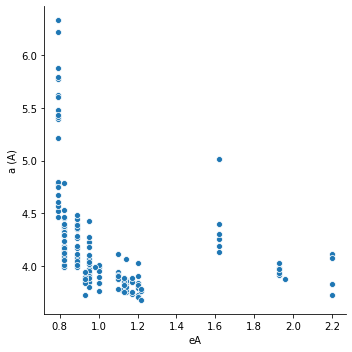

In [26]:
sns.relplot(data=dataset, x="eA", y="a (A)")

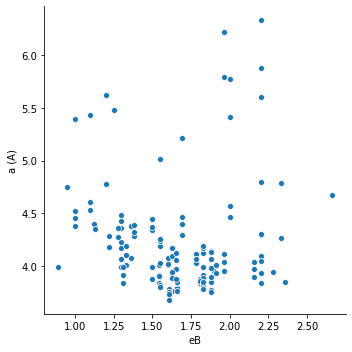

In [27]:
sns.relplot(data=dataset, x="eB", y="a (A)")

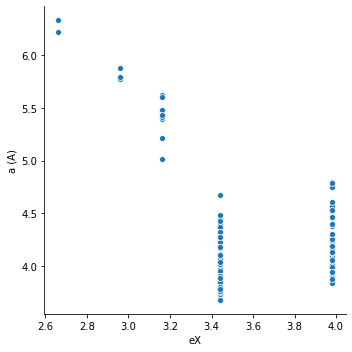

In [28]:
sns.relplot(data=dataset, x="eX", y="a (A)")